# MDI220 Mini-projet 
### SUKERATHA Alexandre

### Librairies utilisées :

In [154]:
from math import *
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Exercice 1 : Exploration des données, recherche de leur loi

### 1.1 Téléchargement des données et pré-processing

In [155]:
# Téléchargement des données 
filePath = u'NuclearPowerAccidents2016.csv'
colonnes = ['Date', 'Cost (millions 2013US$)']
df = pd.read_csv(filePath, usecols=colonnes)

# Quelques infos sur le dataframe
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     216 non-null    object 
 1   Cost (millions 2013US$)  175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB
None


,Date,Cost (millions 2013US$)
0,4/26/1986,259336.0
1,3/11/2011,166089.0
2,12/8/1995,15500.0
3,3/28/1979,10910.0
4,9/11/1957,8189.0


In [156]:
# Nettoyage des données - dropna()
df.dropna(inplace=True)
df['Date']=pd.to_datetime(df['Date'])

# Suppression des données antérieures à l'accident :"Three Mile Island"
TMI_accident_date = np.datetime64('1979-03-28')
mask = df['Date']<TMI_accident_date
filtered_df=df.loc[mask]

# Conversion du dataframe en un vecteur
accidents_array = np.array(filtered_df['Cost (millions 2013US$)'].values)

# Vérification : nombre d'observations
boolean_test = (len(accidents_array)==55)
print(f'Test nombre d\'observations : {boolean_test}')

Test nombre d'observations : True


### 1.2 Construction d'un QQ-plot

#### **1.2.a - preuve théorique**
On s'intéresse à une variable aléatoire $ X\hookrightarrow\mathcal{N}(\mu, \sigma^2) $ .

Sa fonction de répartition est : 
$$F_X(x)=\frac{1}{2}[1+\text{erf}(\frac{x-\mu}{\sigma\sqrt{2}})]$$

$F_X$ étant strictement croissante, la fonction quantile de la loi normale peut s'exprimer : 
$$Q_X(p)=F_X^{-1}(x) \space\text{ avec, }\space Q_X:\left]0;1\right[
 \rightarrow \R $$

ainsi, 
$$p=\frac{1}{2}[1+\text{erf}(\frac{x-\mu}{\sigma\sqrt{2}})]$$
d'où, 
$$\text{erf}(\frac{x-\mu}{\sigma\sqrt{2}})=2p-1$$
on en déduit par bijectivité de la fonction d'erreur que, 
$$\frac{x-\mu}{\sigma\sqrt{2}}=\text{erf}^{-1}(2p-1)$$
enfin, 
$$x=\mu+\sigma\sqrt{2}*\text{erf}^{-1}(2p-1)$$
On en conclut que : 
$$F^{-1}_{(\mu, \sigma^2)}(p)=\mu+\sigma\sqrt{2}*\text{erf}^{-1}(2p-1)$$

D'où, 
$$F^{-1}_{(0,1)}(p)=\sqrt{2}*\text{erf}^{-1}(2p-1)$$

on retrouve donc bien, 
$$\boxed{F^{-1}_{(\mu, \sigma^2)}=\mu+\sqrt{\sigma^2} F^{-1}_{(0,1)}}$$


#### **1.2.b - tracé graphique**

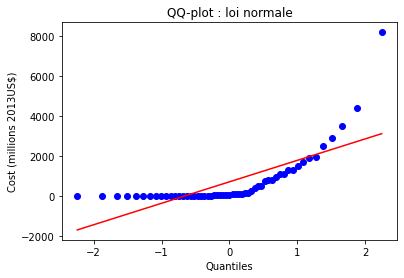

In [157]:
# Tracé du QQ-plot
stats.probplot(accidents_array, dist="norm", plot=plt)

# Définition des axes
plt.title('QQ-plot : loi normale')
plt.xlabel('Quantiles')
plt.ylabel('Cost (millions 2013US$)')

plt.show()
plt.close()

### 1.3 Modèle des lois exponentielles

#### **1.3.a - preuve théorique**
On s'intéresse à une variable aléatoire $ X\hookrightarrow\mathcal{E}(\lambda) $ avec $\lambda>0$.

Sa fonction de répartition est :
$$
F_X(x) = \left\{
    \begin{array}{ll}
        0 & \text{ si } x<0 \\
        1-e^{\lambda x} & \text{ si } x\ge 0 
    \end{array}
\right.
$$

la fonction quantile de la loi exponentielle peut s'exprimer pour $p>0$ :
$$Q_X(p)=F^{-1}_X(x)$$
ainsi, 
$$p=1-e^{- \lambda x}$$
d'où, 
$$x=-\frac{\text{ln}(1-p)}{\lambda}$$
on en conclut que, 
$$F^{-1}_{\lambda}(p)=-\frac{1}{\lambda}{ln}(1-p)$$
en évaluant en $\lambda=1$ on obtient,
$$F^{-1}_{1}(p)=-{ln}(1-p)$$ 
on retrouve donc bien, 
$$\boxed{\forall p \in (0,1) \space ; \space F^{-1}_{\lambda}(p)=\frac{F^{-1}_{1}(p)}{\lambda}}$$

#### **1.3.b - tracé graphique**

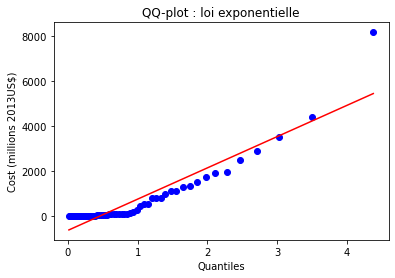

In [158]:
# Tracé du QQ-plot
stats.probplot(accidents_array, dist="expon", plot=plt)

# Définition des axes
plt.title('QQ-plot : loi exponentielle')
plt.xlabel('Quantiles')
plt.ylabel('Cost (millions 2013US$)')

plt.show()
plt.close()

### 1.4 Evaluation de la loi la plus plausible
Graphiquement, le modèle numéro 2 (loi exponentielle) se rapproche plus d'une droite que le modèle numéro 1. La loi exponentielle semble plus plausible que la loi normale dans l'exemple considéré. 


## Exercice 2 : Estimation ponctuelle des paramètres d'une loi exponentielle

### 2.1 Calcul de l'estimateur du maximum de vraisemblance
Par continuité de la loi exponentielle et indépendance des $X_i$ pour $i\in\{1,...,n\}$ on obtient :
$$L(x_1,...,x_n;\lambda)=\prod_{i=1}^n \lambda e^{-\lambda x_i}=\lambda^n e^{-\lambda \sum x_i}$$
On peut ainsi exprimer la log-vraisemblance :
$$\text{ln}(L(x_1,...,x_n;\lambda))=n\log(\lambda) - \lambda\sum_{i=1}^{n} x_i\$$
Pour estimer le maximum de vraisemblance, il convient de dériver partiellement la dernière expression par rapport à $\lambda$ :
$$\frac{\partial \text{ln}(L(x_1,...,x_n;\lambda))}{\partial \lambda}=\frac{n}{\lambda}-\sum_{i=1}^{n} x_i$$
On recherche maintenant un point d'annulation $\lambda_0$ de l'expression : 
$$\frac{n}{\lambda_0}-\sum_{i=1}^{n} x_i=0$$
ce qui donne, 
$$\lambda_0=\frac{n}{\sum_{i=1}^{n} x_i}$$
Il reste maintenant à vérifier que ce point d'annulation correspond bel et bien à un maximum. Pour cela on calcule la dérivée seconde de la log-vraisemblance :
$$\frac{\partial^2 \text{ln}(L(x_1,...,x_n;\lambda))}{\partial^2 \lambda}=-\frac{n}{\lambda^2}$$
La dérivée seconde étant négative. On conclut que ce point d'annulation correspond à un maximum. On peut ainsi conclure le calcul de l'estimateur du maximum de vraisemblance $\hat{\lambda}_n$:
$$\boxed{\hat{\lambda}_n=\frac{n}{\sum_{i=1}^{n} x_i}}$$
On peut maintenant appliquer notre estimateur au set de données :

In [159]:
# Fonction : estimateur du maximum de vraisemblance
decimals = 5

def estimateur_max_vrai(data_array): 
    return round(len(data_array)/(data_array.sum()),decimals)

In [173]:
# Calcul lambda estimation ponctuelle
lambda_max_vr = estimateur_max_vrai(accidents_array)
print(f'lambda estimé par la méthode du maximum de vraisemblance : {lambda_max_vr}')

lambda estimé par la méthode du maximum de vraisemblance : 0.00138


### 2.2 Tracé graphique

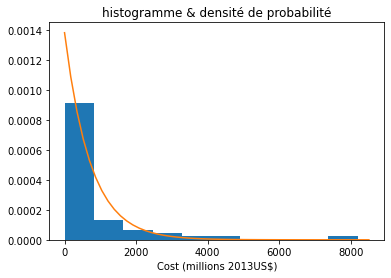

In [174]:
# Histogramme des données 
plt.hist(accidents_array, density=True)

# Densité de probabilité de la loi exponentielle
x = np.linspace(0,8500)
y = lambda_max_vr*np.exp(-lambda_max_vr*x)
plt.plot(x,y)

# Définition des axes 
plt.title('histogramme & densité de probabilité')
plt.xlabel('Cost (millions 2013US$)')

plt.show()
plt.close()

### 2.3 Efficacité de l'estimateur
On considère $X=(X_1,...,X_n)$, où les $X_i$ sont indépendants, identiquement distribués, de loi exponentielle $\mathcal{E}(\lambda)$.

On note $T_1(X)=\frac{1}{n}\sum_{i=1}^nX_i$. Montrons que $T_1(X)$ est un estimateur efficace pour $g_1(\lambda)=\frac{1}{\lambda}$.

#### **2.3.a - Estimateur sans biais**
On a, 
$$\mathbb{E}_\lambda[T_1(X)]=\frac{1}{n}\sum_{i=1}^n\mathbb{E}_\lambda(X_i)=\frac{1}{n}*\frac{n}{\lambda}=\frac{1}{\lambda}$$
On en déduit que, 
$$\boxed{b(\lambda,T_1)=\mathbb{E}_\lambda [T_1 - g_1(\lambda)]=0}$$
Conclusion, l'estimateur est sans biais. 

#### **2.3.b - Borne de Cramér-Rao**
Calculons dans un premier temps l'information de Fisher $I(\lambda)$. Pour $n=1$ observation, la densité de probabilité est $p_\lambda(x)=\lambda e^{-\lambda x}$. On en déduit le score, 
$$\frac{\partial \text{ln}p_\lambda}{\partial \lambda}(x)=\frac{1}{\lambda}-x$$
et ainsi, l'information de Fisher :
$$I_1(\lambda)=\frac{1}{\lambda^2}$$
Pour $n$ observations, l'information de Fisher est donc :
$$\boxed{I(\lambda)=nI_1(\lambda)=\frac{n}{\lambda^2}}$$

On calcule à présent la variance de l'estimateur $T_1$ :
$$\mathbb{V}\text{ar}\left[T_1(X) \right] = \mathbb{V}\text{ar}\left( n^{-1}\sum_{i=1}^nX_i\right)$$
d'où,
$$\mathbb{V}\text{ar}\left[T_1(X) \right]=n^{-2}\sum_{i=1}^n\mathbb{V}\text{ar}(X_i)=n^{-1}\mathbb{V}\text{ar}(X)$$
ainsi,
$$\mathbb{V}\text{ar}\left[T_1(X) \right]=n^{-1}(\mathbb{E}(X^2)-\mathbb{E}(X)^2)=n^{-1}(\frac{2}{\lambda^2}-\frac{1}{\lambda^2})$$
on en conclut que, 
$$\boxed{\mathbb{V}\text{ar}\left[T_1(X) \right]=\frac{1}{n\lambda^2}}$$

Enfin, on a : 
$$g_1'(\lambda)=-\frac{1}{\lambda^2}\implies g_1'(\lambda)^2=\frac{1}{\lambda^4}$$

La borne de Cramér-Rao est ainsi vérifiée : 
$$\boxed{\frac{1}{n\lambda^2}=\mathbb{V}\text{ar}\left[T_1(X) \right]\ge \frac{g_1'(\lambda)^2}{I(\lambda)}=\frac{1}{n\lambda^2}}$$

Conclusion, l'estimateur $T_1$ est efficace. 

### 2.4 Calcul de $g_1$ en utilisant $T_1$ sur l'échantillon

In [111]:
decimal = 3
def T1(data_array): 
    return round(data_array.sum()/len(data_array),decimal)

In [121]:
g1_T1 = T1(accidents_array)
print(f'Estimation de g1 en utilisant T1: {g1_T1}')

Estimation de g1 en utilisant T1: 726.34


### 2.5 Analyse d'un nouvel estimateur
On a déjà prouvé pour l'estimateur $T_1$ que :
$$\boxed{\mathbb{E}[T_1(X)] = \frac{1}{\lambda}}$$
$$\boxed{\mathbb{V}\text{ar}[T_1(X)] =\frac{1}{n\lambda^2}}$$
On en déduit le biais et le risque associé à l'estimateur, 
$$b(\lambda,T_1)=0$$
$$\text{EQM}(\lambda, T_1)=(b(\lambda,T_1))^2+\mathbb{V}\text{ar}[T_1(X)]=\frac{1}{n\lambda^2}$$

Appliquons le même raisonnement au nouvel estimateur. On commence par chercher son espérance et sa variance :
$$\mathbb{E}[\tilde{T}_{(1,\eta)}(X)]=\mathbb{E}[\eta T_1(X)]=\eta\mathbb{E}[T_1(X)]$$
ainsi, 
$$\boxed{\mathbb{E}[\tilde{T}_{(1,\eta)}(X)]=\frac{\eta}{\lambda}}$$
On a de même, 
$$\mathbb{V}\text{ar}[\tilde{T}_{(1,\eta)}(X)]=\mathbb{V}\text{ar}[\eta T_1(X)]=\eta^2\mathbb{V}\text{ar}[T_1(X)]$$
ainsi, 
$$\boxed{\mathbb{V}\text{ar}[\tilde{T}_{(1,\eta)}(X)]=\frac{\eta^2}{n\lambda^2}}$$
On en déduit le biais et le risque associé à l'estimateur, 
$$b(\lambda,\tilde{T}_1)=\mathbb{E}[\tilde{T}_{(1,\eta)}(X)]-g(\lambda)=\frac{\eta-1}{\lambda}$$
$$\text{EQM}(\lambda, \tilde{T}_1)=\mathbb{V}\text{ar}[\tilde{T}_{(1,\eta)}(X)]+b(\lambda,\tilde{T}_1)^2=\frac{1}{\lambda^2}(\frac{\eta^2}{n}+ \eta^2-2\eta+1)$$
On cherche les $\eta$ tel que $\forall \lambda>0, \text{EQM}(\lambda, \tilde{T}_1)<\text{EQM}(\lambda, T_1)$. 

Ainsi, on cherche l'ensemble des $\eta$ vérifiant :
$$\frac{1}{\lambda^2}(\frac{\eta^2}{n}+ \eta^2-2\eta+1)<\frac{1}{n\lambda^2}$$
d'où, 
$$\eta^2+n\eta^2-2n\eta+n<1$$
on obtient, 
$$\eta^2(n+1)-2n\eta+(n-1)<0$$
La résolution de cette inéquation du second degré nous donne :
$$\boxed{\frac{n-1}{n+1}<\eta<1}$$
On a ainsi déterminé les valeurs de $\eta$ pour lesquelles l'inéquation des risques quadratiques est vérifiée.
Ce résultat ne rentre pas en contradiction avec la question précédente, nous avons seulement déterminé un autre estimateur plus intéressant du point de vue du risque quadratique sur l'intervalle des $\eta$. Ceci ne remet pas en cause les propriétés de $T_1$ comme déterminées précédemment.


### 2.6 Estimateur sans biais de la médiane
On note $m$ la médiane, on a donc : 
$$\mathbb{P}_\lambda(X>m)=\frac{1}{2}$$
ainsi, 
$$e^{-\lambda m}=\frac{1}{2} \implies m = \frac{\text{ln}(2)}{\lambda}$$
Nous cherchons à estimer la grandeur d'intérêt $g_2(\lambda)=\frac{\text{ln}(2)}{\lambda}=m$ à l'aide de l'estimateur $\tilde{T}_{(1,\eta)}$ et tel que celui-ci soit sans biais, $b(\lambda, \tilde{T}_{(1,\eta)})=0$.

Ainsi, on veut : 
$$b(\lambda, \tilde{T}_{(1,\eta)})=\mathbb{E}[\tilde{T}_{(1,\eta)}]-\frac{\text{ln}(2)}{\lambda}=0$$
d'où, 
$$\mathbb{E}[\tilde{T}_{(1,\eta)}]=\frac{\text{ln}(2)}{\lambda}$$
on peut enfin conclure que, 
$$\boxed{\frac{\eta}{\lambda}=\frac{\text{ln}(2)}{\lambda}\implies \eta=\text{ln}(2)}$$

In [163]:
# Estimateur sans biais de la médiane
est_sb_med = round(np.log(2)*(1/lambda_max_vr), 1)
print(f'médiane avec estimateur : {est_sb_med}')

# Médiane empirique
med_emp = np.median(accidents_array)
print(f'médiane empirique : {med_emp}')

# Pourcentage de variation 
prc_diff = round(100*(est_sb_med - med_emp)/est_sb_med, 1)
print(f'pourcentage de variation : {prc_diff}%')


médiane avec estimateur : 502.3
médiane empirique : 89.9
pourcentage de variation : 82.1%


Cette différence notable entre les deux résultats s'explique par la qualité des échantillons. En effet si l'on se réferre à l'histogramme, on observe une quantité non négligeable d'observations égales à 0. 

### 2.7 Comparaison des risques quadratiques
On applique ici les formules des risques des estimateurs comme déterminées à la question 2.5 :
$$\text{EQM}(\lambda, \tilde{T}_1)=\frac{1}{\lambda^2}(\frac{\eta^2}{n}+ \eta^2-2\eta+1)$$
et, 
$$\text{EQM}(\lambda, T_1)=\frac{1}{n\lambda^2}$$
de plus on a, 
$$ \eta=\text{ln}(2) \text{ et }n=55 \text{ (échantillon d'étude)}$$
On peut donc s'attaquer directement au calcul numérique :

In [164]:
decimal = 2
def EQM_T1(lmbda, n): 
    return round(1/(n*lmbda**2),decimal)

def EQM_T1_tilde(eta, lmbda, n):
    return round(1/(lmbda**2)*((eta**2)/n+eta**2-2*eta+1),decimal)

In [165]:
eta = np.log(2)
lmbda = lambda_max_vr
n = 55

print(f'risque quadratique de T1 : {EQM_T1(lmbda,n)}')
print(f'risque quadratique de T1_tilde : {EQM_T1_tilde(eta, lmbda, n)}')

risque quadratique de T1 : 9547.27
risque quadratique de T1_tilde : 54029.7


Le risque quadratique de $T_1$ est plus faible que celui de $\tilde{T_1}$ pour l'échantillon d'étude $n=55$.$\\$
Observons comment celui-ci évolue en fonction de $n$ :

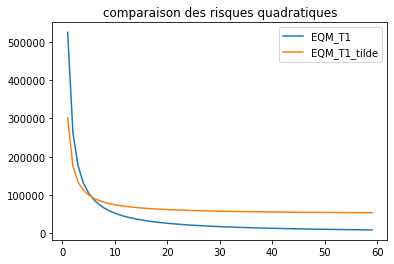

In [187]:
# Paramètres
n_arange = np.arange(1,60,1)

# Tracé graphique
plt.plot(n_arange, [EQM_T1(lambda_max_vr, t) for t in n_arange], label="EQM_T1")
plt.plot(n_arange, [EQM_T1_tilde(eta, lambda_max_vr, t) for t in n_arange], label="EQM_T1_tilde")

# Définition des axes
plt.title("comparaison des risques quadratiques")
plt.legend(loc="upper right")

plt.show()
plt.close()

## Exercice 3 : Test sur le paramètre d'une loi

### 3.1 Formulation des hypothèses
On raisonne sur le coût moyen : $\mathbb{E}(X)$
* **Hypothèse Null** ; $H_0 : \mathbb{E}(X)\ge1000$ donc $H_0 : \frac{1}{\lambda} \ge 1000$
* **Hypothèse Alternative** ; $H_1 : \mathbb{E}(X)<1000$ donc $H_1 : \frac{1}{\lambda} < 1000$

### 3.2 Principe de Neyman-Pearson 
On peut déterminer le test UPP pour le niveau $\alpha$ en utilisant la fonction de vraisemblance monotone. On pose $T$ la fonction de décision et $f$ notre fonction monotone. On a alors,

$$\forall \lambda_2 > \lambda_1 \space,\space Z_{\lambda_2,\lambda_1}(x) = \frac{p_{\lambda_2}(x)}{p_{\lambda_1}(x)} = f(T(x))$$



La variable $X$ suivant la loi $\mathcal{E}(\lambda)$ : $p_\lambda(x) = \lambda e^{-\lambda x}$.
On a donc,
$$P_\lambda(X) = \lambda^n e^{-\lambda \sum _{i=1} ^n x_i}= \lambda^n e^{-\lambda W(x)}\space \text{ avec, } W(X) = \sum _{i=1} ^n x_i$$


On obtient ainsi la fonction de vraisemblance suivante :
$$Z_{\lambda_2, \lambda_1}(X) = \left(\frac{\lambda_2}{\lambda_1}\right)^n e^{(\lambda_1 - \lambda_2)W(X)}$$

On a : $\lambda_1 - \lambda_2 <0$. Ainsi, $Z_{\lambda_2, \lambda_1}$ est décroissante monotone. Notre fonction de décision pour le test UPP pour le niveau  $\alpha$ est donc:

$$\delta(X) = \bm{1}_{\{ W(X) < c \}} \space \text{avec }c\text{ une constante}$$



### 3.3 Détermination de la p-valeur
On sait que les $(X_i)_{1\le i\le n}$ sont iid et suivent la même loi $\mathcal{E}(\lambda)$.
On peut donc affirmer que :
$$\sum_{i=1}^n X_i \hookrightarrow \Gamma\left(n,\frac{1}{\lambda}\right)$$
Il ne reste plus qu'à déterminer le quantile de la loi $\Gamma\left(n,\frac{1}{\lambda}\right)$ pour $\alpha=0.05$ et ainsi conclure sur la région de rejet.


In [57]:
# Calcul de la p-valeur
p_valeur = round(stats.gamma.cdf(x=accidents_array.sum(), a=accidents_array.size, scale=1000), 3)

print(f'p-valeur : {p_valeur}')

p-valeur : 0.014


Ainsi, on a : $\text{p-valeur} < \alpha \\$ 
On peut donc rejeter l'hypothèse null. Conclusion, le coût moyen des accidents est inférieur à un milliard de dollars.

### 3.4 Densité de probabilité et région de rejet

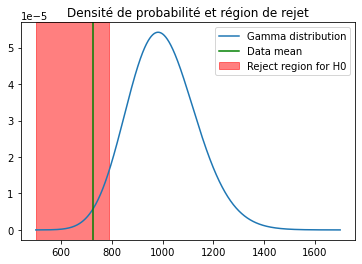

In [166]:
# Paramètres 
n = 55
alpha = 0.05
x = np.arange(500, 1700)
gamma = stats.gamma(n, scale=1000)
quantile = gamma.ppf(alpha)/n
quantile_p = gamma.ppf(p_valeur)/n

# Tracé graphique 
plt.plot(x, gamma.pdf(x*n), label="Gamma distribution")
plt.axvline(accidents_array.mean(), label="Data mean", color='green')
plt.axvspan(500, quantile, color="red", label="Reject region for H0", alpha=0.5)

# Légendes
plt.legend(loc="upper right")
plt.title("Densité de probabilité et région de rejet")

plt.show()
plt.close()

### 3.5 Fonction puissance de test
On trace la fonction puissance de test pour des tailles d'échantillon choisies arbitrairement : $n\in\{10, 100, 1000, 5000\}$

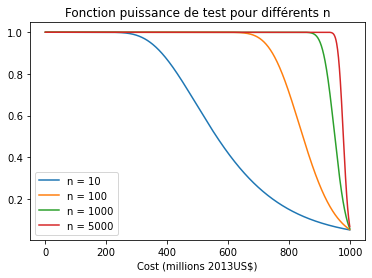

In [169]:
liste_taille_echantillons = [10, 100, 1000, 5000]
lambdas = np.arange(1,999,1)
alpha = 0.05

for n in liste_taille_echantillons:
    ppf_n = stats.gamma.ppf(alpha, n, scale=1000)
    gamma_lambdas = [stats.gamma.cdf(ppf_n,n,scale = x) for x in lambdas]
    plt.plot(lambdas, gamma_lambdas, label=f'n = {n}')

plt.title('Fonction puissance de test pour différents n')
plt.xlabel('Cost (millions 2013US$)')
plt.legend(loc="lower left")

plt.show()
plt.close()

### 3.6 Théorème central limite
D'après le **théorème centrale limite**, une somme de variables aléatoires indépendantes et identiquement distribuées tend, le plus souvent, vers une variable aléatoire gaussienne. 

Ainsi, on obtiendrait une distribution qui se rapprocherait d'une distribution normale avec l'augmentation du nombre d'échantillons observés.

On peut envisager de refaire le test comme à la question 3.4 en utilisant cette fois-ci la loi normale : $\mathcal{N}(\frac{1}{\lambda}, \frac{1}{n\lambda^2})$

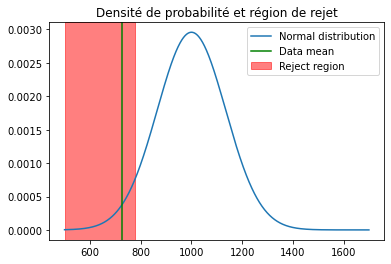

In [172]:
# Paramètres 
n = 55
alpha = 0.05
x = np.arange(500, 1700)
mean = 1000
variance = (mean**2)/n
normale = stats.norm(loc=mean, scale=np.sqrt(variance))

# Tracé graphique 
plt.plot(x, normale.pdf(x), label="Normal distribution")
plt.axvline(accidents_array.mean(), label="Data mean", color='green')
plt.axvspan(500, normale.ppf(alpha), color="red", label="Reject region", alpha=0.5)

# Légendes
plt.legend(loc="upper right")
plt.title("Densité de probabilité et région de rejet")

plt.show()
plt.close()

Conclusion, l'hypothèse $H_0$ est de nouveau rejetée.